In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [25]:
from sklearn.datasets import load_boston
boston = load_boston()

In [26]:
df_data = pd.DataFrame(boston.data, columns=boston.feature_names)
df_target = pd.DataFrame(boston.target, columns=['MEDV'])
df = pd.concat([df_data, df_target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [37]:
lstat = df.loc[:,["LSTAT"]].values
rm = df.loc[:,["RM"]].values
y = df.loc[:,["MEDV"]].values

In [39]:
from sklearn.model_selection import train_test_split
lstat_train, lstat_test, y_train, y_test = train_test_split(lstat, y, test_size = 0.3, random_state = 0)
# 線形回帰のモデルを学習させる
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(lstat_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

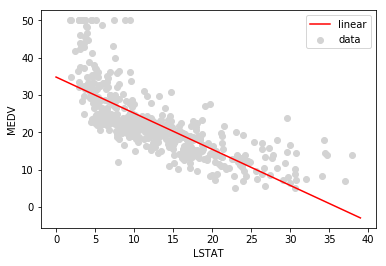

In [42]:
plt.scatter(lstat,y,color ='lightgray',label ="data")
x = np.arange(0,40,1)[:, np.newaxis]
plt.plot(x, model_lin.predict(x), color = "red", label = "linear")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.legend(loc='upper right')
plt.show()

In [43]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [53]:
def cubic(x):
    y = 0.0001*(X**3 + X**2 + X+1)
    return y

np.random.seed(3)
X = np.random.normal(0,10,30)
y  = cubic(x)
y += np.random.normal(0,0.25, len(y))
X = X.reshape(-1,1)
X_plot = np.arange(-25,25,0.1) 
y_plot = cubic(X_plot)
X_plot = X_plot.reshape(-1,1)

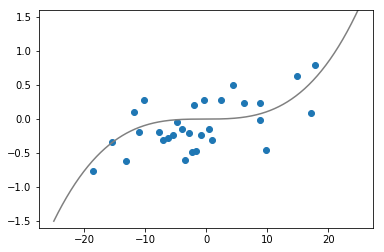

In [56]:
# 適当なデータセットを生成
# 中のコードは気にしなくていいので､今回はグラフだけ眺めてください

# 適当な三次関数を出力する関数を定義
def cubic(X):
    y = 0.0001 * (X**3 + X**2 + X + 1)
    return y

# サンプルデータの生成
np.random.seed(3)                         # 乱数生成器の状態を指定
X = np.random.normal(0, 10, 30)           # 正規分布に従って30個のデータ点を生成
y = cubic(X)                              # 対応するyを三次関数で指定
y += np.random.normal(0, 0.25, len(y))    # 正規分布に従うノイズを加える
X = X.reshape(-1, 1)                      # sklearnで扱えるように､一行のベクトルに変換

# 三次関数をプロットする用のデータを生成
X_plot = np.arange(-25, 25, 0.1)          # -25~+25の範囲に､0.1刻みでデータ点を取る
y_plot = cubic(X_plot)                    # 対応するyを三次関数で指定
X_plot = X_plot.reshape(-1, 1)            # sklearnで扱えるように､一行のベクトルに変換
# グラフを描画
plt.scatter(X, y)                         # データ点をプロット
plt.plot(X_plot, y_plot, color='gray')    # もととなる三次関数を描画
plt.ylim([-1.6, 1.6])                     # 縦の表示範囲を指定
plt.show() 

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [60]:
Ir = LinearRegression()

In [62]:
pol = PolynomialFeatures(degree =7)
X_pol = pol.fit_transform(X)
Ir.fit (X_pol,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
X_plot_pol = pol.fit_transform(X_plot)
y_plot_pol = Ir.predict(X_plot_pol)

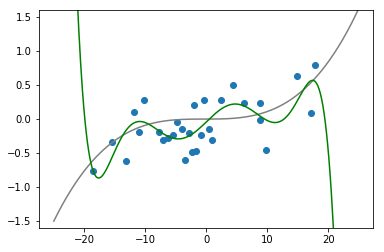

In [64]:
plt.scatter(X, y)                                    # データ点をプロット
plt.plot(X_plot, y_plot, color='gray')               # もととなる三次関数を描画
plt.plot(X_plot, y_plot_pol, color='green')          # 通常の多項式回帰のモデルを描画
plt.ylim([-1.6, 1.6])                                # 縦の表示範囲を指定
plt.show() 

In [65]:
from sklearn.linear_model import Ridge
model_ridge = Ridge (alpha = 1000)
model_ridge.fit(X_pol,y)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

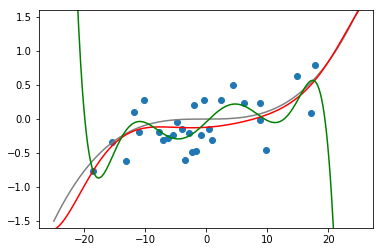

In [66]:
plt.scatter(X, y)                                              # データ点をプロット
plt.plot(X_plot, y_plot, color='gray')                         # もととなる三次関数を描画
plt.plot(X_plot, model_ridge.predict(X_plot_pol), color='red') # Ridge回帰によるモデルを描画
plt.plot(X_plot, y_plot_pol, color='green')                    # 通常の多項式回帰のモデルを描画
plt.ylim([-1.6, 1.6])                                          # 縦の表示範囲を指定
plt.show()     

In [67]:
Ir.coef_

array([  0.00000000e+00,   8.65504973e-02,   4.11571234e-04,
        -1.64948411e-03,  -4.05575048e-06,   9.48940782e-06,
         5.18992808e-09,  -1.49851211e-08])

In [68]:
model_ridge.coef_

array([  0.00000000e+00,   6.00178293e-03,   1.35634933e-03,
         1.14754021e-06,  -5.17185214e-06,   4.16096324e-07,
         5.24302212e-09,  -4.29044302e-10])

In [69]:
from numpy import linalg as LA
LA.norm(Ir.coef_)

0.086567192885011676

In [70]:
LA.norm(model_ridge.coef_)

0.0061531382276878762

In [71]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha = 1000)
model_lasso.fit(X_pol,y)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

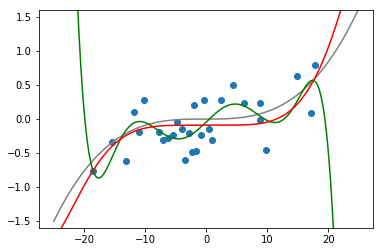

In [72]:
plt.scatter(X, y)                                              # データ点をプロット
plt.plot(X_plot, y_plot, color='gray')                         # もととなる三次関数を描画
plt.plot(X_plot, y_plot_pol, color='green')                    # 通常の多項式回帰によるモデルを描画
plt.plot(X_plot, model_lasso.predict(X_plot_pol), color='red') # LASSO回帰によるモデルを描画
plt.ylim([-1.6, 1.6])                                          # 縦の表示範囲を指定
plt.show()          

In [73]:
Ir.coef_

array([  0.00000000e+00,   8.65504973e-02,   4.11571234e-04,
        -1.64948411e-03,  -4.05575048e-06,   9.48940782e-06,
         5.18992808e-09,  -1.49851211e-08])

In [74]:
model_lasso.coef_

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   4.84889999e-07,
         2.03058492e-09,  -4.20064051e-10])

In [79]:
from numpy import linalg as LA
LA.norm(lr.coef_, ord=1)

NameError: name 'lr' is not defined

In [80]:
LA.norm(model_lasso.coef_, ord=1)

4.8734064792308564e-07

In [84]:
def left_join(phrases):
    if "right" in phrases:
        phrases.replace("right" , "left")
        return ",".join(phrases)
    else:
        return ",".join(phrases)
    """
        Join strings and replace "right" to "left"
    """

In [85]:
left_join("right")

'r,i,g,h,t'

In [86]:
! pip install -U chainer==2.0

    100% |████████████████████████████████| 327kB 1.8MB/s ta 0:00:01
Requirement already up-to-date: filelock in /Users/matuura/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages (from chainer==2.0)
Requirement already up-to-date: nose in /Users/matuura/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages (from chainer==2.0)
    100% |████████████████████████████████| 4.6MB 265kB/s eta 0:00:01
    100% |████████████████████████████████| 378kB 893kB/s ta 0:00:011
    100% |████████████████████████████████| 481kB 2.0MB/s eta 0:00:01
  Running setup.py bdist_wheel for chainer ... done
  Stored in directory: /Users/matuura/Library/Caches/pip/wheels/89/56/eb/e821cea4cd834b24428e29eb9b62e0c0c27c2fc6c987995ffc
Successfully built chainer
  Found existing installation: numpy 1.13.1
    Uninstalling numpy-1.13.1:
      Successfully uninstalled numpy-1.13.1
  Found existing installation: six 1.10.0
    Uninstalling six-1.10.0:
      Successfully uninstalled six-1.10.0
  Found exis

In [87]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

import chainer
import chainer.functions as F           # パラメータを含まない関数を収録したパッケージ
import chainer.links as L               # パラメータを含む関数を収録したパッケージ
from chainer import serializers 

In [161]:
def tangodigram(phrases):
    jj = phrases.split(" ")
    ff = "".join(jj)
    for i in range(len(ff)-1):
        print(ff[i]+ff[i+1])

In [162]:
tangodigram("I am an NLPer")

Ia
am
ma
an
nN
NL
LP
Pe
er


In [293]:
def mojidigram(phrases,X):
    X=[]
    for i in range(len(phrases)-1):
        X.append(phrases[i]+phrases[i+1])
    return X

In [314]:
mojidigram("paraparaparadise",XX)
print(XX)
"se"  in XX

['pa', 'ar', 'ra', 'ap', 'pa', 'ar', 'ra', 'ap', 'pa', 'ar', 'ra', 'ad', 'di', 'is', 'se']


True

In [311]:
Y=mojidigram("paragraph",Y)
print(Y)
"se" in Y

['pa', 'ar', 'ra', 'ag', 'gr', 'ra', 'ap', 'ph']


False

In [304]:
XX_set = set(XX)
Y_set = set(Y)

In [307]:
XX_set & Y_set

{'ap', 'ar', 'pa', 'ra'}

In [308]:
XX_set | Y_set

{'ad', 'ag', 'ap', 'ar', 'di', 'gr', 'is', 'pa', 'ph', 'ra', 'se'}

In [119]:
phrases = "I am an NLPer"
len(phrases)

13

In [328]:
def aaa(x,y,z):
    print("{}時の{}は{}".format(x,y,z))

In [329]:
aaa(24,"気温",22.4)

24時の気温は22.4


In [327]:
jj = phrases.split(" ")
ff = "".join(jj)
print(ff[0]+ff[1])


Ia


In [330]:
def cipher (sentense):
    # 変数を用意
    sentenseList = []
    result = ''

    for i in range (0, len(sentense)):
        # i番目の文字が小文字の場合
        if sentense[i].islower():
            # リストのi番目にアスキーコード(219-アスキーコード)に対応する文字を挿入
            sentenseList.insert(i, chr(219-ord(sentense[i])))
        # i番目の文字が小文字ではない場合そのままリストに挿入
        else:
            sentenseList.insert(i, sentense[i])
                
    # リストを文字列に戻す
    for ii in range (0, len(sentense)):
        result += sentenseList[ii]
        
    #文字列を返す
    return result
        

In [332]:
cipher ("I am Engineer")

'I zn Emtrmvvi'

In [459]:
import random
def iyu (sentence1):
    sentenceList = []
    result = ''
    we = sentence1.split(" ")
    for i in range (len(we)):
        if len(we[i])>4:
            wee = we[i][1:-1]
            aaa = list(wee)
            bbb=random.sample(aaa,len(aaa))
            bbb.insert(0,we[i][0])
            bbb.insert(-1,we[i][-1])
            s="".join(bbb)
            sentenceList.insert(i, s)
        else:
            sentenceList.insert(i,we[i])
    for ii in range (len(we)):
        result += sentenceList[ii]
        
    #文字列を返す
    return result

In [460]:
iyu("I couldn't believe that I could actually understand what I was reading : the phenomenal power of the human mind .")

"Icdnol'tubievleethatIcuodlalatulycuaenrntsddwhatIwasrineagd:thepehomnanlepoerwofthehmunamind."

In [458]:
sentence2="I couldn't believe that I could actually understand what I was reading : the phenomenal power of the human mind ."
we = sentence2.split(" ")
len(we[2])
wee = we[2][1:-1]
aaa = list(wee)
print(aaa)
print(len(aaa))
bbb=random.sample(aaa,len(aaa))
bbb
bbb.insert(0,we[2][0])
bbb.insert(-1,we[2][-1])

['e', 'l', 'i', 'e', 'v']
5


In [440]:
type(bbb)

list

In [456]:
u=bbb.insert(-1,we[2][-1])
u